In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


sns.set()

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

In [6]:
df = pd.read_csv('df.csv')

In [7]:
features = df.loc[:,['budget', 'ratings_count', 'runtime',
       'usa_gross', 'user_rating', 'year', 'Australia', 'Canada', 'China',
       'France', 'Germany', 'Hong Kong', 'Japan', 'Spain', 'UK', 'USA',
       'other_country', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R',
       'Antoine Fuqua', 'Brett Ratner', 'Chris Columbus', 'Clint Eastwood',
       'David Fincher', 'Gore Verbinski', 'Ivan Reitman', 'Joel Schumacher',
       'M. Night Shyamalan', 'Michael Bay', 'Paul W.S. Anderson',
       'Ridley Scott', 'Robert Zemeckis', 'Roland Emmerich', 'Ron Howard',
       'Steven Soderbergh', 'Steven Spielberg', 'Tim Burton', 'Tony Scott',
       'other_director', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]
target = df.loc[:,'proportion']

### Normal Linear Regression

Regression using all features

In [16]:
X_train1, X_test, y_train1, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train1 = scaler.fit_transform(X_train1)
X_val = scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)

m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)

0.27490636569558236

In [17]:
m.score(X_val,y_val)

-1.423618243724582e+25

In [18]:
m.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
m.score(X_test,y_test)

-2.379035910301148e+26

This model doesn't do very well at all. It's possible there are too many irrelevant features or there's not a linear relationship between the features and target.

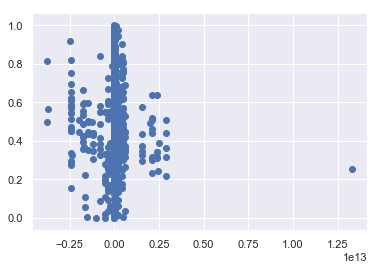

In [20]:
plt.scatter(m.predict(X_train),y_train)

(array([2.600e+01, 5.200e+01, 1.351e+03, 2.800e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3.73747483e+12, -2.03449897e+12, -3.31523112e+11,  1.37145275e+12,
         3.07442861e+12,  4.77740447e+12,  6.48038033e+12,  8.18335619e+12,
         9.88633205e+12,  1.15893079e+13,  1.32922838e+13]),
 <a list of 10 Patch objects>)

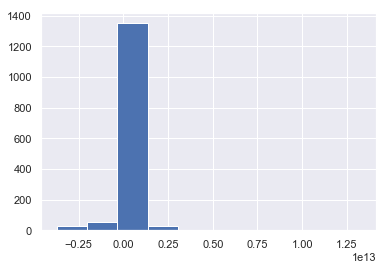

In [21]:
plt.hist(m.predict(X_train)-y_train)

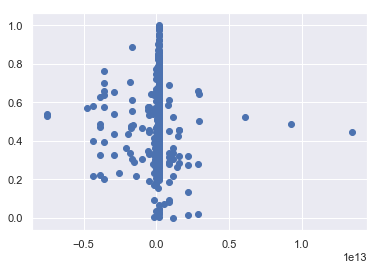

In [22]:
plt.scatter(m.predict(X_val),y_val)

(array([  2.,  16.,  18., 427.,  21.,   0.,   1.,   0.,   1.,   1.]),
 array([-7.49044200e+12, -5.39932786e+12, -3.30821372e+12, -1.21709958e+12,
         8.74014559e+11,  2.96512870e+12,  5.05624284e+12,  7.14735698e+12,
         9.23847112e+12,  1.13295853e+13,  1.34206994e+13]),
 <a list of 10 Patch objects>)

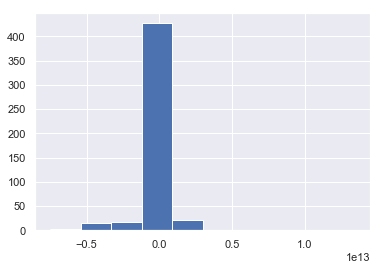

In [23]:
plt.hist(m.predict(X_val)-y_val)

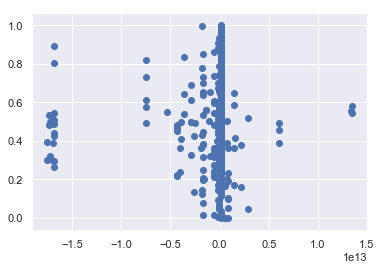

In [24]:
plt.scatter(m.predict(X_test),y_test)

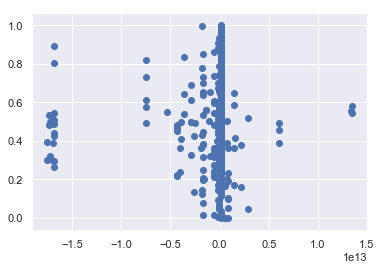

In [25]:
plt.scatter(m.predict(X_test)-y_test, y_test)

(array([ 18.,   0.,   0.,   6.,  20., 590.,   9.,   3.,   0.,   3.]),
 array([-1.75370761e+13, -1.44362132e+13, -1.13353502e+13, -8.23448726e+12,
        -5.13362431e+12, -2.03276136e+12,  1.06810159e+12,  4.16896455e+12,
         7.26982750e+12,  1.03706904e+13,  1.34715534e+13]),
 <a list of 10 Patch objects>)

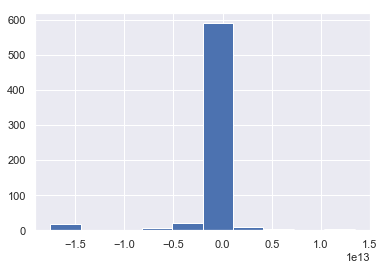

In [26]:
plt.hist(m.predict(X_test)-y_test)

In [27]:
c = list(zip(features.columns,m.coef_))
c = sorted(c, key=lambda x: x[1])
c

[('USA', -2946216585248.1714),
 ('UK', -2097617669652.9214),
 ('other_country', -1089715174704.3335),
 ('PG-13', -1084218879924.1416),
 ('R', -1067557325543.0065),
 ('France', -1034879365381.3263),
 ('Germany', -1020672041862.4365),
 ('Canada', -847627066667.0172),
 ('PG', -843111508387.4143),
 ('China', -714683060392.621),
 ('Australia', -671675948100.3638),
 ('Hong Kong', -521086046848.1946),
 ('Spain', -491411501393.2158),
 ('Japan', -459792009229.2682),
 ('G', -394630898494.65344),
 ('Not Rated', -302201592601.7925),
 ('NC-17', -86814434704.91513),
 ('budget', -0.0637599377862084),
 ('ratings_count', -0.029245737038121652),
 ('Animation', -0.0272216796875),
 ('year', -0.02258587054674296),
 ('Romance', -0.01568603515625),
 ('Fantasy', -0.01092529296875),
 ('Adventure', -0.01055908203125),
 ('Horror', -0.008026123046875),
 ('Drama', -0.00732421875),
 ('Thriller', -0.007293701171875),
 ('Action', -0.00628662109375),
 ('Music', -0.0061798095703125),
 ('Musical', -0.00440216064453125),

It looks like country of origin and rating are the most important in predicting how much money a movie makes domestically versus abroad.

In [28]:
RMSE(m.predict(X_train),y_train)

642942974171.604

In [29]:
RMSE(m.predict(X_val),y_val)

1314927267625.9492

In [30]:
RMSE(m.predict(X_test),y_test)

3188656752988.5244

This is pretty terrible.

### Polynomial (2nd-degree), unregularized

Let's see if polynomial regression might provide a better fit.

In [31]:
poly2 = PolynomialFeatures(2)

lm_poly2 = LinearRegression()
lm_poly2.fit(poly2.fit_transform(X_train), y_train)
lm_poly2.score(poly2.fit_transform(X_train), y_train)

0.6361153614207375

In [32]:
lm_poly2.score(poly2.fit_transform(X_val), y_val)

-5.467722343616611e+24

In [35]:
lm_poly2.fit(poly2.fit_transform(X_train1),y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
lm_poly2.score(poly2.fit_transform(X_test), y_test)

-1.8798072510188441e+25

It massively overfits to the training data. It's possible there are still too many features, or it just still isn't a good fit.

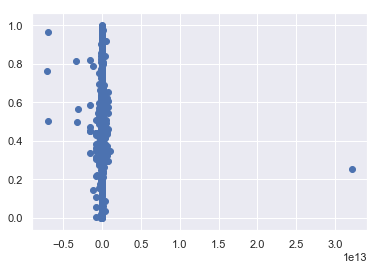

In [37]:
plt.scatter(lm_poly2.predict(poly2.transform(X_train)), y_train)

(array([6.00e+00, 1.45e+03, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([-7.05061375e+12, -3.13060675e+12,  7.89400244e+11,  4.70940724e+12,
         8.62941424e+12,  1.25494212e+13,  1.64694282e+13,  2.03894352e+13,
         2.43094422e+13,  2.82294492e+13,  3.21494562e+13]),
 <a list of 10 Patch objects>)

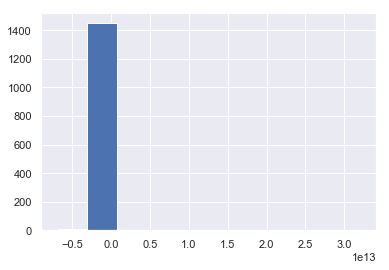

In [38]:
plt.hist(lm_poly2.predict(poly2.transform(X_train))- y_train)

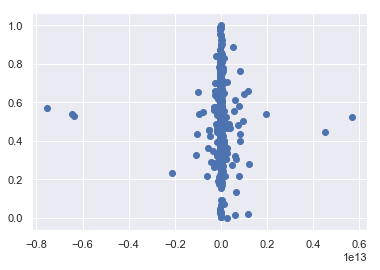

In [39]:
plt.scatter(lm_poly2.predict(poly2.transform(X_val)), y_val)

(array([  3.,   0.,   0.,   0.,   5., 457.,  19.,   1.,   0.,   2.]),
 array([-7.52387665e+12, -6.20399589e+12, -4.88411513e+12, -3.56423437e+12,
        -2.24435361e+12, -9.24472847e+11,  3.95407914e+11,  1.71528868e+12,
         3.03516944e+12,  4.35505020e+12,  5.67493096e+12]),
 <a list of 10 Patch objects>)

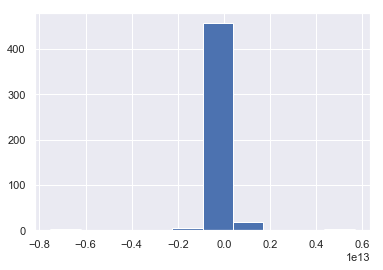

In [40]:
plt.hist(lm_poly2.predict(poly2.transform(X_val))- y_val)

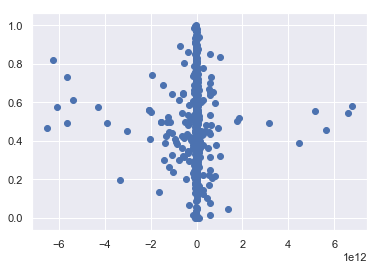

In [41]:
plt.scatter(lm_poly2.predict(poly2.transform(X_test)), y_test)

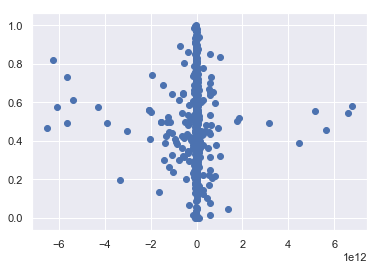

In [42]:
plt.scatter((lm_poly2.predict(poly2.transform(X_test))- y_test),y_test)

(array([  6.,   2.,   2.,  15., 575.,  41.,   2.,   1.,   2.,   3.]),
 array([-6.49643488e+12, -5.17063857e+12, -3.84484227e+12, -2.51904596e+12,
        -1.19324966e+12,  1.32546649e+11,  1.45834295e+12,  2.78413926e+12,
         4.10993557e+12,  5.43573187e+12,  6.76152818e+12]),
 <a list of 10 Patch objects>)

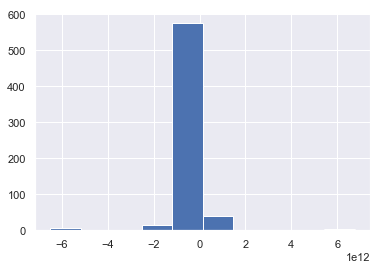

In [43]:
plt.hist(lm_poly2.predict(poly2.transform(X_test))- y_test)

In [44]:
RMSE(lm_poly2.predict(poly2.transform(X_train)), y_train)

927603084367.3857

In [45]:
RMSE(lm_poly2.predict(poly2.transform(X_val)), y_val)

673742393383.328

In [46]:
RMSE(lm_poly2.predict(poly2.transform(X_test)), y_test)

896321745829.9324

Again, this is pretty terrible.

In [47]:
feats = poly2.get_feature_names()
c = list(zip(feats,lm_poly2.coef_))
c = sorted(c, key=lambda x: x[1])
c[-10:-1]

[('x20', 198019868852.66226),
 ('x11', 201105951585.9261),
 ('x21', 216823003655.94528),
 ('x13', 258906780938.33917),
 ('x22', 299474837444.0527),
 ('x12', 435289935336.6353),
 ('x31', 455397063757.67346),
 ('x18', 546538779885.0515),
 ('x32', 560870508088.16)]

The most important 10 coefficients look to be: PG, Hong Kong, PG-13, Spain, R, Japan, M. Night Shyamalan, NC17, and Michael Bay. But this model is still pretty terrible.

### Polynomial (3rd-degree), unregularized

In [48]:
poly3 = PolynomialFeatures(3)

lm_poly3 = LinearRegression()
lm_poly3.fit(poly3.fit_transform(X_train), y_train)
lm_poly3.score(poly3.fit_transform(X_train), y_train)

1.0

In [49]:
lm_poly3.score(poly3.fit_transform(X_val), y_val)

-657.9346056553585

In [50]:
lm_poly3.fit(poly3.fit_transform(X_train1), y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
lm_poly3.score(poly3.fit_transform(X_test), y_test)

-2.2938973643695776e+19

Again, massively overfits to the training data.

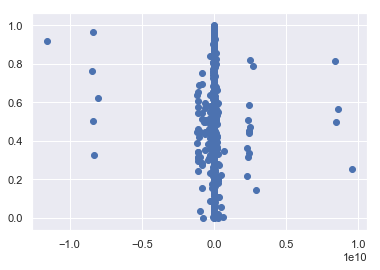

In [52]:
plt.scatter(lm_poly3.predict(poly3.transform(X_train)), y_train)

(array([  1.,   2.,   0.,   6., 631.,   2.,   3.,   1.,   0.,   3.]),
 array([-9.72972731e+09, -7.59138391e+09, -5.45304050e+09, -3.31469709e+09,
        -1.17635369e+09,  9.61989721e+08,  3.10033313e+09,  5.23867654e+09,
         7.37701994e+09,  9.51536335e+09,  1.16537068e+10]),
 <a list of 10 Patch objects>)

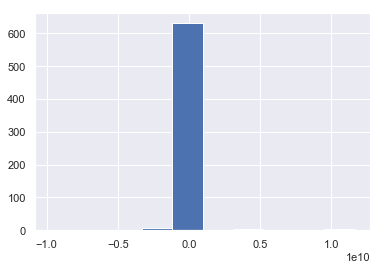

In [53]:
plt.hist(lm_poly3.predict(poly3.transform(X_test))- y_test)

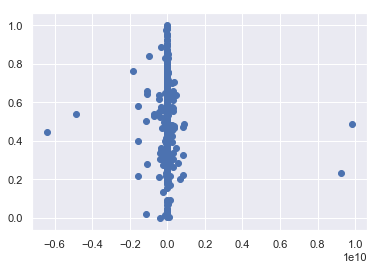

In [54]:
plt.scatter(lm_poly3.predict(poly3.transform(X_val)), y_val)

(array([  2.,   0.,   4., 444.,  35.,   0.,   0.,   0.,   0.,   2.]),
 array([-6.38493063e+09, -4.76424317e+09, -3.14355572e+09, -1.52286826e+09,
         9.78191970e+07,  1.71850665e+09,  3.33919411e+09,  4.95988157e+09,
         6.58056903e+09,  8.20125648e+09,  9.82194394e+09]),
 <a list of 10 Patch objects>)

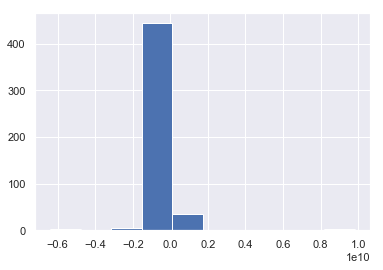

In [55]:
plt.hist(lm_poly3.predict(poly3.transform(X_val))- y_val)

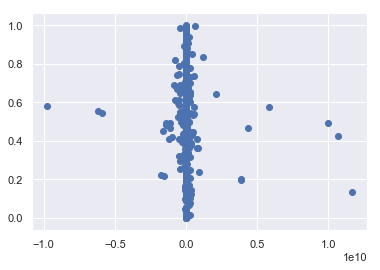

In [56]:
plt.scatter(lm_poly3.predict(poly3.transform(X_test)), y_test)

(array([  1.,   2.,   0.,   6., 631.,   2.,   3.,   1.,   0.,   3.]),
 array([-9.72972731e+09, -7.59138391e+09, -5.45304050e+09, -3.31469709e+09,
        -1.17635369e+09,  9.61989721e+08,  3.10033313e+09,  5.23867654e+09,
         7.37701994e+09,  9.51536335e+09,  1.16537068e+10]),
 <a list of 10 Patch objects>)

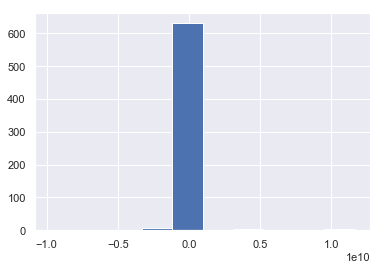

In [57]:
plt.hist(lm_poly3.predict(poly3.transform(X_test))- y_test)

In [58]:
RMSE(lm_poly3.predict(poly3.transform(X_train)), y_train)

787090585.545339

In [59]:
RMSE(lm_poly3.predict(poly3.transform(X_val)), y_val)

750036269.2393117

In [60]:
RMSE(lm_poly3.predict(poly3.transform(X_test)), y_test)

990134661.3864784

Still pretty bad...

In [61]:
params = []
for each in features:
    params.append(poly2.get_params(each))

In [62]:
feats = poly3.get_feature_names()
c = list(zip(feats,lm_poly3.coef_))
c = sorted(c, key=lambda x: x[1])
c[-10:-1]

[('x8^2 x15', 6930618.571765887),
 ('x11^2 x15', 7627448.517641601),
 ('x5 x53^2', 7853356.180654071),
 ('x37^2 x42', 8266538.786456966),
 ('x32^2 x42', 9063452.420043938),
 ('x39^2 x42', 10761313.13176601),
 ('x38^2 x42', 12450822.851975251),
 ('x24^2 x42', 13843932.11146764),
 ('x12^2 x15', 17401198.628252253)]

The most important features here are: China*USA, Hong Kong*USA, year*film-noir, other director*Ron Howard, other director*Michael Bay, other director*Steven Spielberg, other director*Steven Soderbergh, other director*Brett Ratner, USA*Japan. You can tell from these coefficients that though they're the most important, they really don't make a lot of sense, so you can tell it's a bad model. 

### Polynomial (3rd-degree), regularized with Ridge

In [63]:
r = RidgeCV()
r.fit(poly3.fit_transform(X_train),y_train)
r.score(poly3.fit_transform(X_train),y_train)

0.9350015508198091

In [64]:
r.score(poly3.fit_transform(X_val),y_val)

-6.652540262142576

In [65]:
r.fit(poly3.fit_transform(X_train1),y_train1)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [66]:
r.score(poly3.fit_transform(X_test),y_test)

-5.443504597098535

Still massively overfitting, but not quite as terribly as before.

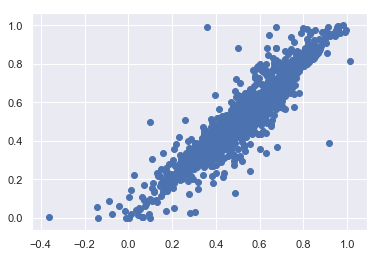

In [67]:
plt.scatter(r.predict(poly3.fit_transform(X_train)),y_train)

(array([1.00e+00, 1.00e+00, 4.00e+00, 2.50e+01, 1.87e+02, 1.08e+03,
        1.40e+02, 1.60e+01, 3.00e+00, 1.00e+00]),
 array([-0.63161103, -0.51559012, -0.39956921, -0.2835483 , -0.16752739,
        -0.05150649,  0.06451442,  0.18053533,  0.29655624,  0.41257715,
         0.52859805]),
 <a list of 10 Patch objects>)

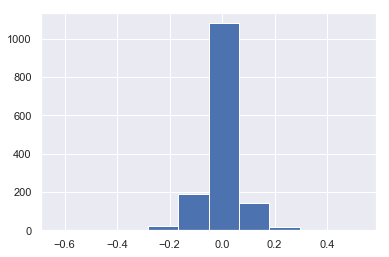

In [68]:
plt.hist(r.predict(poly3.fit_transform(X_train))-y_train)

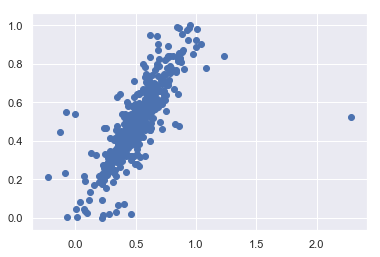

In [69]:
plt.scatter(r.predict(poly3.fit_transform(X_val)),y_val)

(array([  4.,  20., 392.,  65.,   5.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.62324124, -0.38484946, -0.14645768,  0.0919341 ,  0.33032588,
         0.56871766,  0.80710944,  1.04550122,  1.28389299,  1.52228477,
         1.76067655]),
 <a list of 10 Patch objects>)

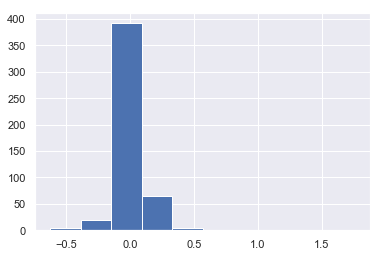

In [70]:
plt.hist(r.predict(poly3.fit_transform(X_val))-y_val)

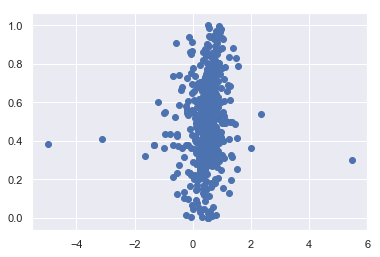

In [71]:
plt.scatter(r.predict(poly3.fit_transform(X_test)),y_test)

(array([  1.,   1.,   0.,  12., 188., 437.,   9.,   0.,   0.,   1.]),
 array([-5.37307301, -4.31994935, -3.26682568, -2.21370202, -1.16057835,
        -0.10745469,  0.94566897,  1.99879264,  3.0519163 ,  4.10503996,
         5.15816363]),
 <a list of 10 Patch objects>)

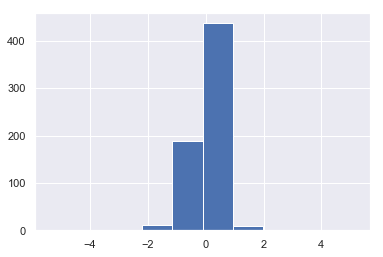

In [72]:
plt.hist(r.predict(poly3.fit_transform(X_test))-y_test)

In [73]:
RMSE(r.predict(poly3.transform(X_train)), y_train)

0.07120339539381185

In [74]:
RMSE(r.predict(poly3.transform(X_val)), y_val)

0.1351721391786967

In [75]:
RMSE(r.predict(poly3.transform(X_test)), y_test)

0.5247692082890818

Not as completely terrible, but still not great.

In [76]:
feats = poly3.get_feature_names()
c = list(zip(feats,r.coef_))
c = sorted(c, key=lambda x: x[1])
c[-10:-1]

[('x0^2 x5', 0.02863437755803783),
 ('x2 x47 x52', 0.028788248383313994),
 ('x4 x5 x55', 0.030157604990389043),
 ('x1 x48 x60', 0.030743415124287247),
 ('x0 x60 x62', 0.03214955870653362),
 ('x5 x51 x59', 0.03282695941873333),
 ('x2 x5 x44', 0.03423150778141039),
 ('x5 x44 x50', 0.035451626186653734),
 ('x3 x48 x60', 0.03702276883722758)]

The coefficients here are budget-year, runtime-comedy-fantasy, user rating-year-horror, ratings count-crime-scifi, budget-scifi-thriller, year-family-romance, runtime-year-adventure, year-adventure-drama, and usa gross-crime-scifi. These coefficients make a bit more sense.

### Polynomial (3rd-degree), regularized with Lasso

In [77]:
l = LassoCV()
l.fit(poly3.fit_transform(X_train),y_train)
l.score(poly3.fit_transform(X_train),y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_desc

0.1937757612048724

In [78]:
l.score(poly3.fit_transform(X_val),y_val)

0.0787380043319954

In [79]:
l.fit(poly3.fit_transform(X_train1),y_train1)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [80]:
l.score(poly3.fit_transform(X_test),y_test)

0.135422242795453

This model doesn't overfit, but doesn't perform very well. At least there's a positive R2 though!

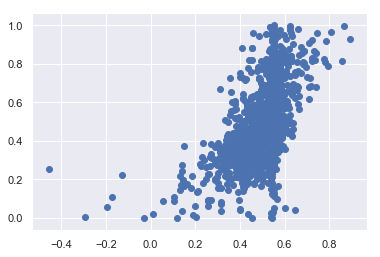

In [81]:
plt.scatter(l.predict(poly3.fit_transform(X_train)),y_train)

(array([  1.,   7.,  54., 138., 293., 540., 323.,  81.,  13.,   8.]),
 array([-0.70793817, -0.57643336, -0.44492855, -0.31342373, -0.18191892,
        -0.0504141 ,  0.08109071,  0.21259553,  0.34410034,  0.47560515,
         0.60710997]),
 <a list of 10 Patch objects>)

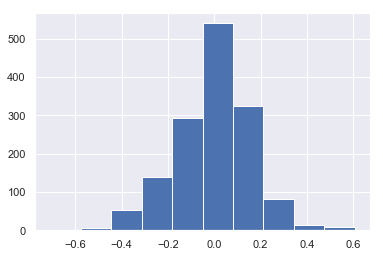

In [82]:
plt.hist(l.predict(poly3.fit_transform(X_train))-y_train)

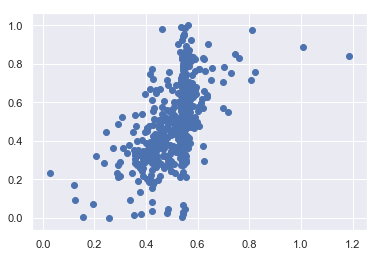

In [83]:
plt.scatter(l.predict(poly3.fit_transform(X_val)),y_val)

(array([  5.,  12.,  35.,  56., 121., 140.,  74.,  30.,   7.,   7.]),
 array([-0.51844062, -0.41298362, -0.30752661, -0.20206961, -0.09661261,
         0.0088444 ,  0.1143014 ,  0.21975841,  0.32521541,  0.43067242,
         0.53612942]),
 <a list of 10 Patch objects>)

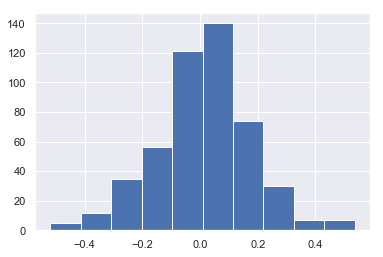

In [84]:
plt.hist(l.predict(poly3.fit_transform(X_val))-y_val)

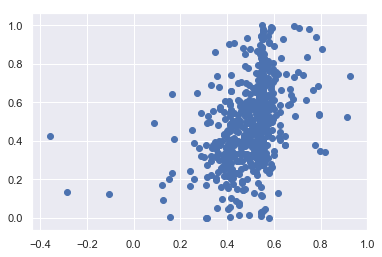

In [85]:
plt.scatter(l.predict(poly3.fit_transform(X_test)),y_test)

(array([  1.,   0.,  23.,  41., 103., 181., 177.,  86.,  27.,  10.]),
 array([-0.78721344, -0.65088068, -0.51454793, -0.37821518, -0.24188243,
        -0.10554967,  0.03078308,  0.16711583,  0.30344859,  0.43978134,
         0.57611409]),
 <a list of 10 Patch objects>)

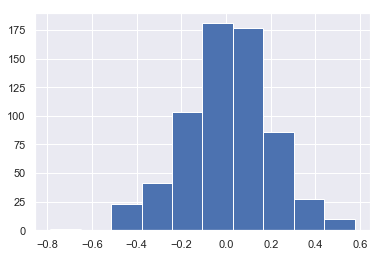

In [86]:
plt.hist(l.predict(poly3.fit_transform(X_test))-y_test)

In [87]:
RMSE(l.predict(poly3.transform(X_train)), y_train)

0.16319784669189075

In [88]:
RMSE(l.predict(poly3.transform(X_val)), y_val)

0.1661382925467566

In [89]:
RMSE(l.predict(poly3.transform(X_test)), y_test)

0.19222474877529658

A little better!

In [90]:
feats = poly3.get_feature_names()
c = list(zip(feats,l.coef_))
c = sorted(c, key=lambda x: x[1])
c[-10:-1]

[('x9^2 x48', 0.0006764598173781746),
 ('x26^2 x43', 0.0007282192053266001),
 ('x10^2 x47', 0.0008124415967374144),
 ('x3 x16^2', 0.0008241794201859162),
 ('x14 x19^2', 0.0009280261399879329),
 ('x9^2 x52', 0.0009903201993809686),
 ('x0 x63^2', 0.001162333472896495),
 ('x62 x63^2', 0.0014835198616204226),
 ('x47^3', 0.0017286174615403901)]

The coefficients are France-crime, Clint Eastwood-action, Germany-comedy, usa gross-other country, UK-not rated, France-fantasy, budget-war, and comedy. Sort of make sense.

### Random Forests

In [91]:
rf = RandomForestRegressor(n_estimators=800, max_features=4)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9066892484741872

In [92]:
rf.score(X_val, y_val)

0.26760838041178436

In [93]:
rf.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=800, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [94]:
rf.score(X_test, y_test)

0.32444773059051235

This overfits but is still way better than the linear models.

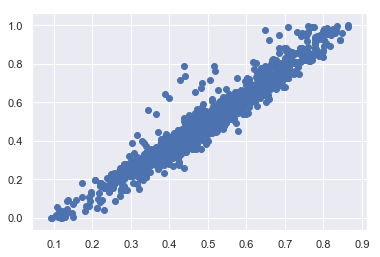

In [95]:
plt.scatter(rf.predict(X_train),y_train)

(array([  2.,   7.,  17.,  40., 107., 259., 528., 373., 106.,  19.]),
 array([-0.35403272, -0.29975483, -0.24547693, -0.19119904, -0.13692114,
        -0.08264325, -0.02836535,  0.02591254,  0.08019044,  0.13446833,
         0.18874623]),
 <a list of 10 Patch objects>)

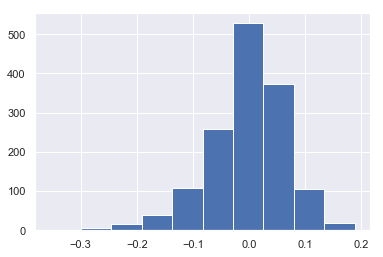

In [96]:
plt.hist(rf.predict(X_train)-y_train)

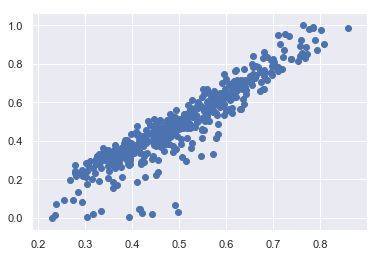

In [97]:
plt.scatter(rf.predict(X_val),y_val)

(array([  2.,   7.,  17.,  40., 107., 259., 528., 373., 106.,  19.]),
 array([-0.35403272, -0.29975483, -0.24547693, -0.19119904, -0.13692114,
        -0.08264325, -0.02836535,  0.02591254,  0.08019044,  0.13446833,
         0.18874623]),
 <a list of 10 Patch objects>)

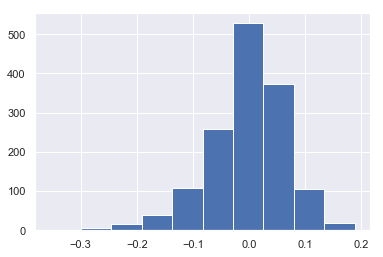

In [98]:
plt.hist(rf.predict(X_train)-y_train)

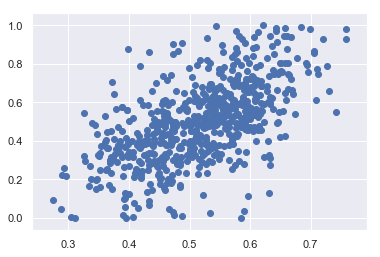

In [99]:
plt.scatter(rf.predict(X_test),y_test)

(array([  2.,   7.,  17.,  40., 107., 259., 528., 373., 106.,  19.]),
 array([-0.35403272, -0.29975483, -0.24547693, -0.19119904, -0.13692114,
        -0.08264325, -0.02836535,  0.02591254,  0.08019044,  0.13446833,
         0.18874623]),
 <a list of 10 Patch objects>)

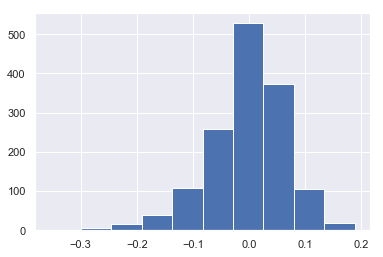

In [100]:
plt.hist(rf.predict(X_train)-y_train)

In [101]:
RMSE(rf.predict(X_train),y_train)

0.07034607861722235

In [102]:
RMSE(rf.predict(X_val),y_val)

0.09675867737991253

In [103]:
RMSE(rf.predict(X_test),y_test)

0.1699169685969962

Not too bad.

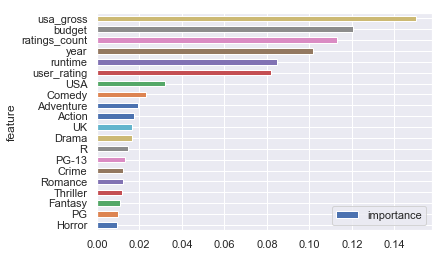

In [104]:
feat_imps = list(zip(features,rf.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.tail(20).plot(x='feature',y='importance',kind='barh')

### Gradient-Boosted

In [105]:
gbm = GradientBoostingRegressor(n_estimators=2000, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

0.9991902100009933

In [106]:
gbm.score(X_val, y_val)

0.12319764306453163

In [107]:
gbm.fit(X_train1, y_train1)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=2000, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [108]:
gbm.score(X_test, y_test)

0.24493820911816133

This overfits a bit more than random forest.

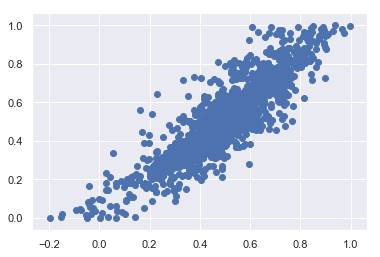

In [109]:
plt.scatter(gbm.predict(X_train),y_train)

(array([  5.,  14.,  42., 100., 257., 592., 313.,  99.,  31.,   5.]),
 array([-0.41460137, -0.34141918, -0.26823699, -0.1950548 , -0.12187261,
        -0.04869043,  0.02449176,  0.09767395,  0.17085614,  0.24403833,
         0.31722051]),
 <a list of 10 Patch objects>)

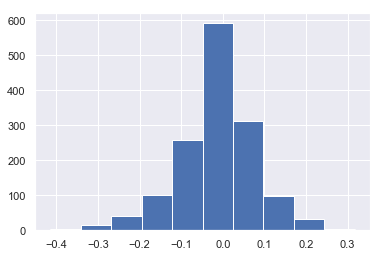

In [110]:
plt.hist(gbm.predict(X_train)-y_train)

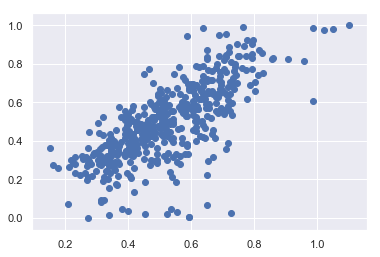

In [111]:
plt.scatter(gbm.predict(X_val),y_val)

(array([  5.,  27., 124., 192.,  81.,  36.,  13.,   3.,   5.,   1.]),
 array([-0.3567082 , -0.25071498, -0.14472176, -0.03872854,  0.06726468,
         0.17325791,  0.27925113,  0.38524435,  0.49123757,  0.59723079,
         0.70322401]),
 <a list of 10 Patch objects>)

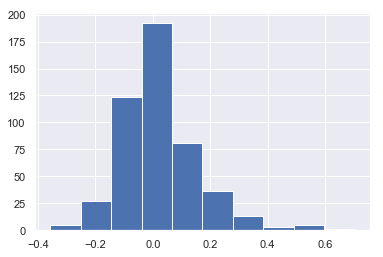

In [112]:
plt.hist(gbm.predict(X_val)-y_val)

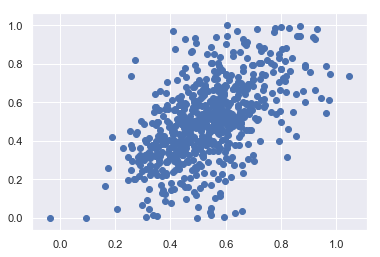

In [113]:
plt.scatter(gbm.predict(X_test),y_test)

(array([  5.,  10.,  34.,  90., 193., 171.,  88.,  39.,  13.,   6.]),
 array([-0.56193641, -0.44355993, -0.32518345, -0.20680698, -0.0884305 ,
         0.02994598,  0.14832246,  0.26669894,  0.38507542,  0.5034519 ,
         0.62182838]),
 <a list of 10 Patch objects>)

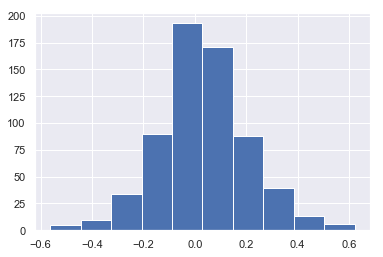

In [114]:
plt.hist(gbm.predict(X_test)-y_test)

In [115]:
RMSE(gbm.predict(X_train),y_train)

0.09351682061591436

In [116]:
RMSE(gbm.predict(X_val),y_val)

0.13896125591179131

In [117]:
RMSE(gbm.predict(X_test),y_test)

0.17963812761043496

Still better than linear models.

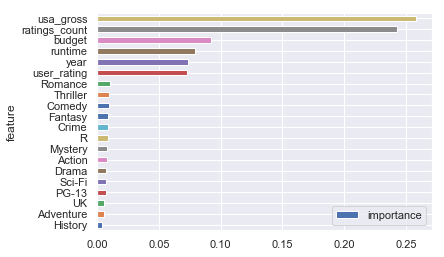

In [118]:
feat_imps = list(zip(features,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.tail(20).plot(x='feature',y='importance',kind='barh')